In [ ]:
#Davian, Abosede, Oun, and Maryana's team

In [109]:
#Load Library DPLYR
library(dplyr)
library(ggplot2)
library(tidyr)

In [110]:
defaultW <- getOption("warn")
options(warn = -1)

In [111]:
#Load Stock Data 
#CHANGE PATH TO YOUR OWN FOR GITHUB PURPOSES

#Retrieve Close & Adj Columns from program
IBM = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/IBM.csv")[, c("Close", "Adj.Close")]
MSFT = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/MSFT.csv") [, c("Close", "Adj.Close")]
GOOG = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/GOOG.csv") [, c("Close", "Adj.Close")]
AAPL= read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/AAPL.csv")  [, c("Close", "Adj.Close")]
AMZN = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/AMZN.csv") [, c("Close", "Adj.Close")]
FB = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/FB.csv")     [, c("Close", "Adj.Close")]
NFLX = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/NFLX.csv")[, c("Close", "Adj.Close")]
TSLA = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/TSLA.csv")[, c("Close", "Adj.Close")]
ORCL = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/ORCL.csv")[, c("Close", "Adj.Close")]
SAP = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/SAP.csv")[, c("Close", "Adj.Close")]
#Date ??
Date = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/IBM.csv")[, c("Date")]


In [52]:
#Rename Columns to have name function
#Rename IBM
names(IBM) = c("IBM.Close","IBM.Adj.Close")
#Rename Amazon
names(AMZN) = c("AMZN.Close","AMZN.Adj.Close")
#Rename Microsoft
names(MSFT) = c("MSFT.Close","MSFT.Adj.Close")
#Rename Google
names(GOOG) = c("GOOG.Close","GOOG.Adj.Close")
#Rename Apple
names(AAPL) = c("AAPL.Close","AAPL.Adj.Close")
#Rename Facebook
names(FB) = c("FB.Close","FB.Adj.Close")
#Rename Netflix
names(NFLX) = c("NFLX.Close","NFLX.Adj.Close")
#Rename Tesla
names(TSLA) = c("TSLA.Close","TSLA.Adj.Close")
#Rename Oracle
names(ORCL) = c("ORCL.Close","ORCL.Adj.Close")
#Rename SAP
names(SAP) = c("SAP.Close","SAP.Adj.Close")


<h2> <b> Retrieve the "Close" and "Adj Close" values for each stock </b> <h2>
    You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.


In [53]:
#Add all Stocks to Dataframe
market = as.data.frame(cbind(Date, IBM, AMZN,MSFT,GOOG,AAPL, FB, NFLX, TSLA,ORCL, SAP))

In [54]:
head(market)

,Date,IBM.Close,IBM.Adj.Close,AMZN.Close,AMZN.Adj.Close,MSFT.Close,MSFT.Adj.Close,GOOG.Close,GOOG.Adj.Close,AAPL.Close,⋯,FB.Close,FB.Adj.Close,NFLX.Close,NFLX.Adj.Close,TSLA.Close,TSLA.Adj.Close,ORCL.Close,ORCL.Adj.Close,SAP.Close,SAP.Adj.Close
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,154.25,129.0939,1189.01,1189.01,85.95,81.84829,1065.00,1065.00,43.0650,⋯,181.42,181.42,201.07,201.07,64.106,64.106,46.63,43.82148,112.39,105.9143
2,2018-01-03,158.49,132.6424,1204.20,1204.20,86.35,82.22920,1082.48,1082.48,43.0575,⋯,184.67,184.67,205.05,205.05,63.450,63.450,47.71,44.83644,113.31,106.7813
3,2018-01-04,161.70,135.3289,1209.59,1209.59,87.11,82.95293,1086.40,1086.40,43.2575,⋯,184.33,184.33,205.63,205.63,62.924,62.924,48.18,45.27813,115.05,108.4210
4,2018-01-05,162.49,135.9901,1229.14,1229.14,88.19,83.98138,1102.23,1102.23,43.7500,⋯,186.85,186.85,209.99,209.99,63.316,63.316,48.47,45.55065,116.33,109.6273
5,2018-01-08,163.47,136.8102,1246.87,1246.87,88.28,84.06710,1106.94,1106.94,43.5875,⋯,188.28,188.28,212.05,212.05,67.282,67.282,48.98,46.02994,114.80,108.1854
6,2018-01-09,163.83,137.1115,1252.70,1252.70,88.22,84.00996,1106.26,1106.26,43.5825,⋯,187.87,187.87,209.31,209.31,66.738,66.738,49.06,46.28467,114.16,107.5823


<h2> <b> You start to manage 5 million dollars fund on Jan 02, 2018 </b> </h2>
<br></br>
    You have a strategy to manage the fund.

In [115]:
# Function to get the Trading Day stock value
#Editing Here
ValueofStock = function(stock, day){
    stock = paste(stock ,  sep="", ".Close")
    price = market[[stock]][day]
    return(price)
}

ERROR: Error in paste(stock, sep = "", ".Close"): object 'stock' not found


In [86]:
# This Function enables traders to purchase Stocks.
buyStocks = function(df) {
    temp = data.frame(stock=df[["stock"]], amount = 0, remainingCash = 0)
    stock = paste(temp[["stock"]] , ".Close", sep="")
    day = df[["day"]]
    price = market[[stock]][day]
    numberOfStockPurchased = df[["cash"]] %/% price
    temp$amount = numberOfStockPurchased
    cashLeft = df[["cash"]] - (numberOfStockPurchased * price)
    temp$remainingCash = cashLeft
    return(temp)
}

In [117]:
#Function to Calculate MTM
mtm = function(today, cash, stocks, shares){
    total = 0
    for (x in 1:length(stocks)){
        value = stockValue(stocks[x], today) * as.numeric(shares[x])
        total = total + value
    }
    total = total + cash
    return(total)
}



In [90]:
droppedMost = function(today, interval){
    mydata = market
    mydata = select(mydata,ends_with("Adj.Close"))
    droppedmost = mydata %>% slice(today-interval,today) %>%
    mutate(IBM = (IBM.Adj.Close - lag(IBM.Adj.Close))/lag(IBM.Adj.Close) * 100) %>%
    mutate(AMZN = (AMZN.Adj.Close - lag(AMZN.Adj.Close))/lag(AMZN.Adj.Close) * 100) %>%
    mutate(AAPL = (AAPL.Adj.Close - lag(AAPL.Adj.Close))/lag(AAPL.Adj.Close) * 100) %>%
    mutate(FB = (FB.Adj.Close - lag(FB.Adj.Close))/lag(FB.Adj.Close) * 100) %>%
    mutate(GOOG = (GOOG.Adj.Close - lag(GOOG.Adj.Close))/lag(GOOG.Adj.Close) * 100) %>%
    mutate(MSFT = (MSFT.Adj.Close - lag(MSFT.Adj.Close))/lag(MSFT.Adj.Close) * 100) %>%
    mutate(NFLX = (NFLX.Adj.Close - lag(NFLX.Adj.Close))/lag(NFLX.Adj.Close) * 100) %>%
    mutate(ORCL = (ORCL.Adj.Close - lag(ORCL.Adj.Close))/lag(ORCL.Adj.Close) * 100) %>%
    mutate(SAP = (SAP.Adj.Close - lag(SAP.Adj.Close))/lag(SAP.Adj.Close) * 100) %>%
    mutate(TSLA = (TSLA.Adj.Close - lag(TSLA.Adj.Close))/lag(TSLA.Adj.Close) * 100) %>%
    select(-contains(".Adj.Close")) %>%
    slice(2)
    allCols = sort(droppedmost[1,1:10])
    cols = c(colnames(allCols))
    return(cols[1:5])
    }

In [91]:
#function to find surged the most
surgedMost = function(today, interval){
    mydata = market
    mydata = select(mydata,ends_with("Adj.Close"))
    surgedMost = mydata %>% slice(today-interval,today) %>%
    mutate(IBM = (IBM.Adj.Close - lag(IBM.Adj.Close))/lag(IBM.Adj.Close) * 100) %>%
    mutate(AMZN = (AMZN.Adj.Close - lag(AMZN.Adj.Close))/lag(AMZN.Adj.Close) * 100) %>%
    mutate(AAPL = (AAPL.Adj.Close - lag(AAPL.Adj.Close))/lag(AAPL.Adj.Close) * 100) %>%
    mutate(FB = (FB.Adj.Close - lag(FB.Adj.Close))/lag(FB.Adj.Close) * 100) %>%
    mutate(GOOG = (GOOG.Adj.Close - lag(GOOG.Adj.Close))/lag(GOOG.Adj.Close) * 100) %>%
mutate(MSFT = (MSFT.Adj.Close - lag(MSFT.Adj.Close))/lag(MSFT.Adj.Close) * 100) %>%
    mutate(NFLX = (NFLX.Adj.Close - lag(NFLX.Adj.Close))/lag(NFLX.Adj.Close) * 100) %>%
    mutate(ORCL = (ORCL.Adj.Close - lag(ORCL.Adj.Close))/lag(ORCL.Adj.Close) * 100) %>%
    mutate(SAP = (SAP.Adj.Close - lag(SAP.Adj.Close))/lag(SAP.Adj.Close) * 100) %>%
    mutate(TSLA = (TSLA.Adj.Close - lag(TSLA.Adj.Close))/lag(TSLA.Adj.Close) * 100) %>%
    select(-contains(".Adj.Close")) %>%
    slice(2)
    allCols = sort(surgedMost[1,1:10])
    cols = c(colnames(allCols))
    return(cols[6:10])
}


In [84]:
#function to calculate percent change
percentChange = function(prev,curr){
    p = curr - prev
    p = p/prev
    return(p*100)
}


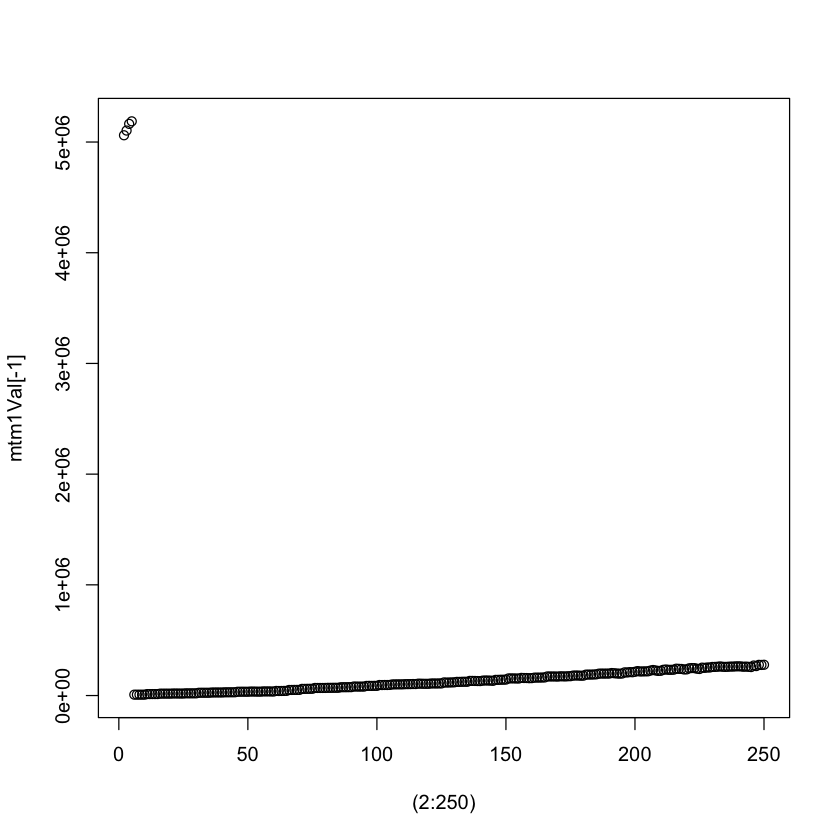

ERROR: Error in rowMeans(htday): 'x' must be numeric


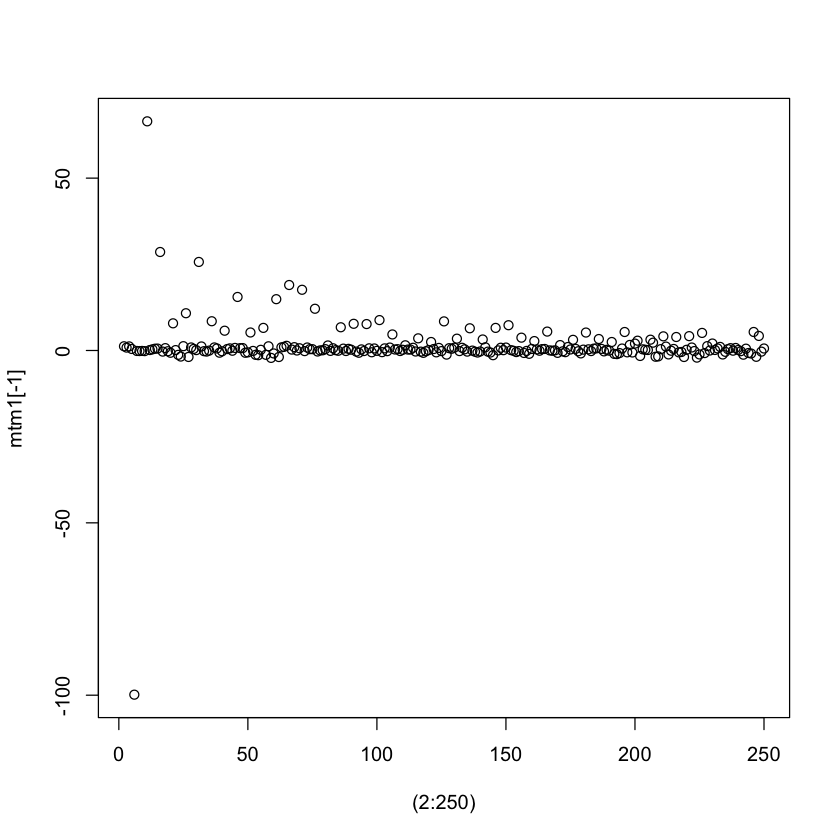

In [116]:
# initialize variables
StockTraderDf = data.frame(day = 12,stock = "IBM",cash = 10000)

stocks = list()
shares = list()
totalCash  = 5000000
dayInterval = 5
mtmprev = 0
mtmcurr = 0
mtm1 = list()
mtm1Val = list()
# 5 days rebalancing of buying low
for (today in 1:NROW(Date)){
    if(today %% dayInterval == 1){
        #initial day
        if(today == 1){
            stocks = list('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
            splitCash = totalCash/5
            totalCash = 0
            for(x in stocks){
                StockTraderDf = data.frame(day = today ,stock = x,cash = splitCash)
                stockDf = buyStocks(buyStocksDf)
                totalCash = totalCash + stockDf$remainingCash
                shares = append(shares, stockDf$amount)
            }
}
        #rebalance
        else {
            #find the 5 stocks whose "Adj Close" prices dropped the most
            mostDropped = droppedMost(today,dayInterval)
            #sell all current holdings
            for(x in stocks){
                totalCash = totalCash + ValueofStock(x, today)
            }
            stocks = list()
            shares = list()
            #split your cash
            splitCash = totalCash/5
            #buy the max shares of stock
            stocks = mostDropped
            for(x in stocks){
                buyStocksDf = data.frame(day = today ,stock = x,cash = splitCash)
                stockDf = buyStocks(buyStocksDf)
                totalCash = totalCash + stockDf$remainingCash
                shares = append(shares, stockDf$amount)
            }
}
    }
    mtmprev = mtmcurr
    #USD to JPY
    mtmcurr = mtm(today, totalCash, stocks, shares)
    mtm1Val = append(mtm1Val, mtmcurr)
    mtm1 = append(mtm1, percentChange(mtmprev,mtmcurr))
}
#total
plot((2:250),mtm1Val[-1])
#percent change
plot((2:250),mtm1[-1])
#function for high-tech index

highTech = function(){
    ht = market
    htday = ht %>% select(1,3,5,7,9,11,13,15,17,19)
    return(rowMeans(htday))
}
myHighTechAvg = highTech()
myHighTechPercent = list()

for(x in 2:250){
    myHighTechPercent = append(myHighTechPercent, percentChange(x-1,x))
}
#High-Tech Stock Percentage Comparison
plot((2:250),myHighTechPercent)